# 2021/5/18 最適化 - ダウンヒルシンプレックス
###### scipyでダウンヒルシンプレックスを試してみる

In [1]:
from scipy.optimize import minimize
import math

#関数定義
def objective_function(X, a, b):
    return (a - X[0])**2 + b * (X[1] - X[0]**2)**2

In [2]:
#パラメータを適当に設定
a = math.sqrt(2)
b = 100
arg = (a, b)

#初期値を[-1,1]としてスタート
res = minimize(objective_function, [-1,1],args=arg, method="Nelder-Mead")

In [3]:
#結果出力
print(res)
print(res.x)

 final_simplex: (array([[1.41420552, 1.99997837],
       [1.41423002, 2.00004845],
       [1.41423177, 2.0000474 ]]), array([1.87919943e-10, 6.36287161e-10, 2.02423285e-09]))
           fun: 1.8791994267553947e-10
       message: 'Optimization terminated successfully.'
          nfev: 171
           nit: 90
        status: 0
       success: True
             x: array([1.41420552, 1.99997837])
[1.41420552 1.99997837]


count	x	y	f
1	-0.991860	1.000000	5.815479
2	-0.777029	0.572041	4.902245
3	-0.714012	0.459431	4.783183
4	-0.669866	0.401610	4.565332
5	-0.605189	0.333053	4.188220
6	-0.438138	0.143971	3.661545
7	-0.296833	0.076447	2.941282
8	-0.219730	0.015140	2.779605
9	-0.124068	-0.024791	2.527786
10	-0.017660	-0.028636	2.134058
11	0.109631	-0.006689	1.736934
12	0.282822	0.036390	1.470131
13	0.377053	0.127045	1.098575
14	0.462945	0.184106	0.996190
15	0.535341	0.262569	0.830115
16	0.629994	0.392421	0.617000
17	0.692350	0.461530	0.552834
18	0.782132	0.585850	0.466507
19	0.851036	0.710496	0.336121
20	0.950850	0.885726	0.248523
21	1.027955	1.061041	0.151087
22	1.088889	1.179187	0.110051
23	1.137874	1.281452	0.094064
24	1.170064	1.358150	0.071491
25	1.217116	1.478636	0.039596
26	1.266564	1.596283	0.028043
27	1.312417	1.716733	0.013617
28	1.338208	1.792033	0.005929
29	1.375674	1.890224	0.001994
30	1.393901	1.940872	0.000848
31	1.404986	1.974309	0.000096
32	1.414149	1.999576	0.000006
33	1.413807	1.998825	0.0

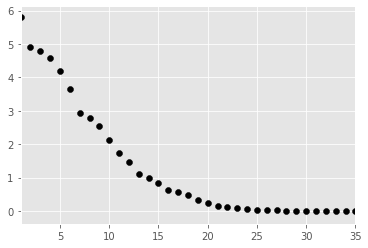

In [4]:
#計算経緯を可視化
import matplotlib.pyplot as plt

count = 0
plt.figure()
plt.style.use("ggplot")
plt.xlim(1, 35)
print('count\tx\ty\tf')

def cbf(X):
    global count
    count += 1
    f = objective_function(X, a, b)
    print('%d\t%f\t%f\t%f' % (count, X[0], X[1], f))
    plt.scatter(count, f, color='black')
    
#callbackでグラフ化
res = minimize(objective_function, [-1, 1], args=arg, callback=cbf)